# Prosper Loan Data Exploration

## Table of Contents
1. [Introduction](#intro)
2. [Initial Data Load](#data)
3. [Exploration](#explore)  
    3.1 [Univariate Exploration](#uni)  
    3.2 [Bivariate Exploration](#bi)  
    3.3 [Multivariate Exploration](#multi)  
4. [Summary](#summary)

## Introduction <a id="intro"></a>

We will be looking at data provided by Prosper for 113,937 loans. This data set contains 81 variables about each loan. We will explore the data and will look to observe any trends based on this data set. This data can be obtained from <a href="https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv">here</a>. We have already downloaded this as a csv (`prosperLoanData.csv`) from the link provided for use.

Due to the number of variables in the data set we are going to keep our exploration down to the following variables, some of which are just reference variables-

|Variable|Description|
|-----|-----|
|ListingKey|Unique key for each listing, same value as the 'key' used in the listing object in the API.|
|ListingNumber|The number that uniquely identifies the listing to the public as displayed on the website.|
|Term|The length of the loan expressed in months.|
|LoanStatus|The current status of the loan: Cancelled, Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.|
|ClosedDate|Closed date is applicable for Cancelled, Completed, Chargedoff and Defaulted loan statuses.|
|BorrowerAPR|The Borrower's Annual Percentage Rate (APR) for the loan.|
|BorrowerRate|The Borrower's interest rate for this loan.|
|EstimatedLoss|Estimated loss is the estimated principal loss on charge-offs. Applicable for loans originated after July 2009.|
|EstimatedReturn|The estimated return assigned to the listing at the time it was created. Estimated return is the difference between the Estimated Effective Yield and the Estimated Loss Rate. Applicable for loans originated after July 2009.|
|ProsperScore|A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score. Applicable for loans originated after July 2009.|
|ListingCategory|The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans|
|Occupation|The Occupation selected by the Borrower at the time they created the listing.|
|IsBorrowerHomeowner|A Borrower will be classified as a homowner if they have a mortgage on their credit profile or provide documentation confirming they are a homeowner.|
|TotalProsperLoans|Number of Prosper loans the borrower at the time they created this listing. This value will be null if the borrower had no prior loans.|
|LoanNumber|Unique numeric value associated with the loan.|
|LoanOriginalAmount|The origination amount of the loan.|
|LoanOriginationDate|The date the loan was originated.|
|Investors|The number of investors that funded the loan.|


To do this exploration we will utilize a number of python modules to load in and aggregate the data and graph it. Packages used include pandas, numpy, seaborn and matplotlib.

We will begin our exploration by first looking at univariate graphs to gather some initial observations. This will hopefully provide some insight on the direction to go for our bivariate exploration, and ultimately our multivariate exploration. Through out this we will note any observations.

To begin we will load in our packages and data set then prepare it for our exploration.

### Initial Data Load<a id="data"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

columns_include = ['ListingKey','ListingNumber','Term','LoanStatus','ClosedDate',
                   'BorrowerAPR','BorrowerRate','EstimatedLoss','EstimatedReturn','ProsperScore',
                   'ListingCategory (numeric)','Occupation','IsBorrowerHomeowner','TotalProsperLoans',
                   'LoanNumber','LoanOriginalAmount','LoanOriginationDate','Investors']


loan_data = pd.read_csv('prosperLoanData.csv', usecols=columns_include)

print(loan_data.shape)
print(loan_data.info())
loan_data.head()


(113937, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ListingKey                 113937 non-null  object 
 1   ListingNumber              113937 non-null  int64  
 2   Term                       113937 non-null  int64  
 3   LoanStatus                 113937 non-null  object 
 4   ClosedDate                 55089 non-null   object 
 5   BorrowerAPR                113912 non-null  float64
 6   BorrowerRate               113937 non-null  float64
 7   EstimatedLoss              84853 non-null   float64
 8   EstimatedReturn            84853 non-null   float64
 9   ProsperScore               84853 non-null   float64
 10  ListingCategory (numeric)  113937 non-null  int64  
 11  Occupation                 110349 non-null  object 
 12  IsBorrowerHomeowner        113937 non-null  bool   
 13  TotalProsperLoan

,ListingKey,ListingNumber,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,EstimatedLoss,EstimatedReturn,ProsperScore,ListingCategory (numeric),Occupation,IsBorrowerHomeowner,TotalProsperLoans,LoanNumber,LoanOriginalAmount,LoanOriginationDate,Investors
0,1021339766868145413AB3B,193129,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,NaN,NaN,NaN,0,Other,True,NaN,19141,9425,2007-09-12 00:00:00,258
1,10273602499503308B223C1,1209647,36,Current,NaN,0.12016,0.0920,0.0249,0.05470,7.0,2,Professional,False,NaN,134815,10000,2014-03-03 00:00:00,1
2,0EE9337825851032864889A,81716,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,NaN,NaN,NaN,0,Other,False,NaN,6466,3001,2007-01-17 00:00:00,41
3,0EF5356002482715299901A,658116,36,Current,NaN,0.12528,0.0974,0.0249,0.06000,9.0,16,Skilled Labor,True,NaN,77296,10000,2012-11-01 00:00:00,158
4,0F023589499656230C5E3E2,909464,36,Current,NaN,0.24614,0.2085,0.0925,0.09066,4.0,2,Executive,True,1.0,102670,15000,2013-09-20 00:00:00,20


#### Dataset Structure

As we can see from our initial load this dataset contains records for 113,937 loans along with both numerical and categorical features for each loan.

#### Main Dataset Interest

The main interest is in looking at the relationships between each of the loan features and how that relates to the loan status (ie do some features seem to have a relationship with loans which will default), estimated loss and return on loans. Finally we will throw in the prosper score to see how that compares with these same features.

#### Features which may lead to different status

Of the features we have loaded in from the data set I would believe prosper score, borrower APR/rate, occupation combined with loan amount to have some relationship with loan status and the esimtated loss/return on the loans.


Before doing our exploratory analysis lets get our data columns sorted out into both numerical data and categorical data so we can easily reference in our initial investigation. For our categorical data we will further update our dataframe to account for those data types. Additionally we will adjust some of our other columns to reflect the correct data types.

We will also clean up the prosper score so that it is correctly 1-10, as there are some records reflecting 11 which we will set to a score of 10.

In [2]:
numerical_columns = ['Term', 'BorrowerAPR', 'BorrowerRate', 'EstimatedLoss', 'EstimatedReturn', 'ProsperScore',
                                'TotalProsperLoans', 'LoanOriginalAmount', 'Investors']

categorical_columns = ['LoanStatus', 'ListingCategory (numeric)', 'Occupation', 'IsBorrowerHomeowner']

loan_data['ClosedDate'] = pd.to_datetime(loan_data['ClosedDate'])
loan_data['LoanOriginationDate'] = pd.to_datetime(loan_data['LoanOriginationDate'])

loan_data.loc[loan_data['ProsperScore'] == 11, 'ProsperScore'] = 10

loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   ListingKey                 113937 non-null  object        
 1   ListingNumber              113937 non-null  int64         
 2   Term                       113937 non-null  int64         
 3   LoanStatus                 113937 non-null  object        
 4   ClosedDate                 55089 non-null   datetime64[ns]
 5   BorrowerAPR                113912 non-null  float64       
 6   BorrowerRate               113937 non-null  float64       
 7   EstimatedLoss              84853 non-null   float64       
 8   EstimatedReturn            84853 non-null   float64       
 9   ProsperScore               84853 non-null   float64       
 10  ListingCategory (numeric)  113937 non-null  int64         
 11  Occupation                 110349 non-null  object  

In [3]:
print(loan_data.describe())

       ListingNumber           Term    BorrowerAPR   BorrowerRate  \
count   1.139370e+05  113937.000000  113912.000000  113937.000000   
mean    6.278857e+05      40.830248       0.218828       0.192764   
std     3.280762e+05      10.436212       0.080364       0.074818   
min     4.000000e+00      12.000000       0.006530       0.000000   
25%     4.009190e+05      36.000000       0.156290       0.134000   
50%     6.005540e+05      36.000000       0.209760       0.184000   
75%     8.926340e+05      36.000000       0.283810       0.250000   
max     1.255725e+06      60.000000       0.512290       0.497500   

       EstimatedLoss  EstimatedReturn  ProsperScore  \
count   84853.000000     84853.000000  84853.000000   
mean        0.080306         0.096068      5.932907   
std         0.046764         0.030403      2.343355   
min         0.004900        -0.182700      1.000000   
25%         0.042400         0.074080      4.000000   
50%         0.072400         0.091700      6.000

## Exploration<a id="explore"></a>

### Univariate Exploration<a id="uni"></a>

So first we will take a look at individual variables. Will focus on the numerical data first and see utilitze histograms to get an idea of each of their distributions.

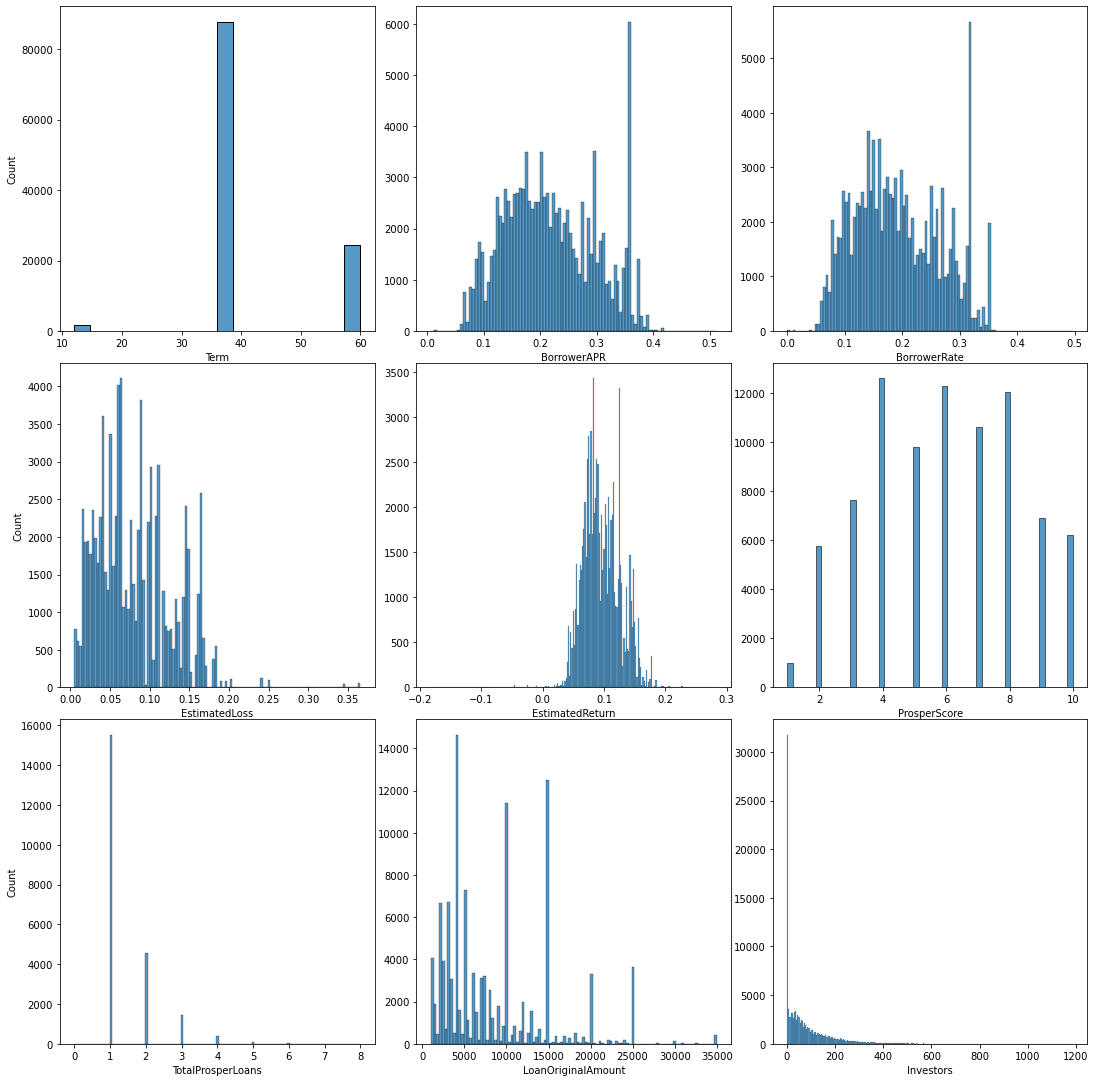

In [4]:
loan_numerical_data = loan_data[numerical_columns]

fig, axes = plt.subplots(3, 3, figsize=(15, 15))

fig.tight_layout()

for i, col in enumerate(loan_numerical_data.columns):
    sb.histplot(loan_numerical_data[col], ax=axes[i//3, i%3]);
    if i%3 != 0:
        axes[i//3, i%3].yaxis.label.set_visible(False)

From these 9 histograms we can see a few things. The first being that Term feature seems to be more of a categorical feature than numerical feature, even though it is the number of months the loan is taken for these are typically a standard number of months (12, 36, 60) so we will want to look at this as categorical data.

Additionally we see that both LoanOriginalAmount and Investors have long tails to them. Lets apply a log scale and look at those 2 features seperately.

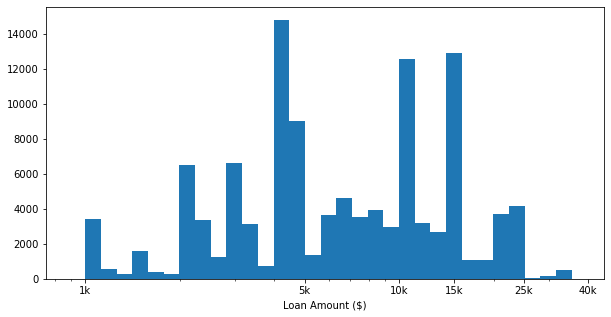

In [5]:
#LoanOriginalAmount log scaled

log_binsize = .05

bins = 10 ** np.arange(2.5, np.log10(loan_data['LoanOriginalAmount'].max()) + log_binsize, log_binsize)

plt.figure(figsize=[10, 5])
plt.hist(data = loan_data, x = 'LoanOriginalAmount', bins = bins);
plt.xlim(750, 45000)
plt.xscale('log');
plt.xticks([1000, 5000, 10000, 15000, 25000, 40000],
           ['1k', '5k', '10k', '15k', '25k', '40k']);
plt.xlabel('Loan Amount ($)');

From our log scaled histogram the distribution of the original loan amounts seem to peak in 5k increments.

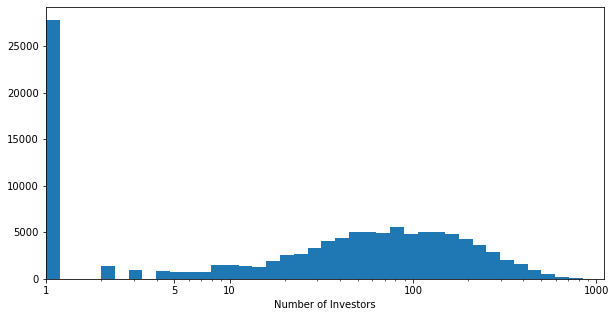

In [6]:
#Investors log scaled

log_binsize = .075

bins = 10 ** np.arange(0, np.log10(loan_data['Investors'].max()) + log_binsize, log_binsize)

plt.figure(figsize=[10, 5])
plt.hist(data = loan_data, x = 'Investors', bins = bins);
plt.xlim(1, 1100)
plt.xscale('log');
plt.xticks([1, 5, 10, 100, 1000],
           [1, 5, 10, 100, 1000]);
plt.xlabel('Number of Investors');

From log scaling our investors data we see that the vast majority of the loans have a single investor however after that large peak the rest of the loans have a roughly normally distribution around a little under 100 investors.

Lets take a look at our categorical data now.

In [7]:
#lets move our term feature from our numerical list to our categorical list
numerical_columns.remove('Term')

categorical_columns.append('Term')

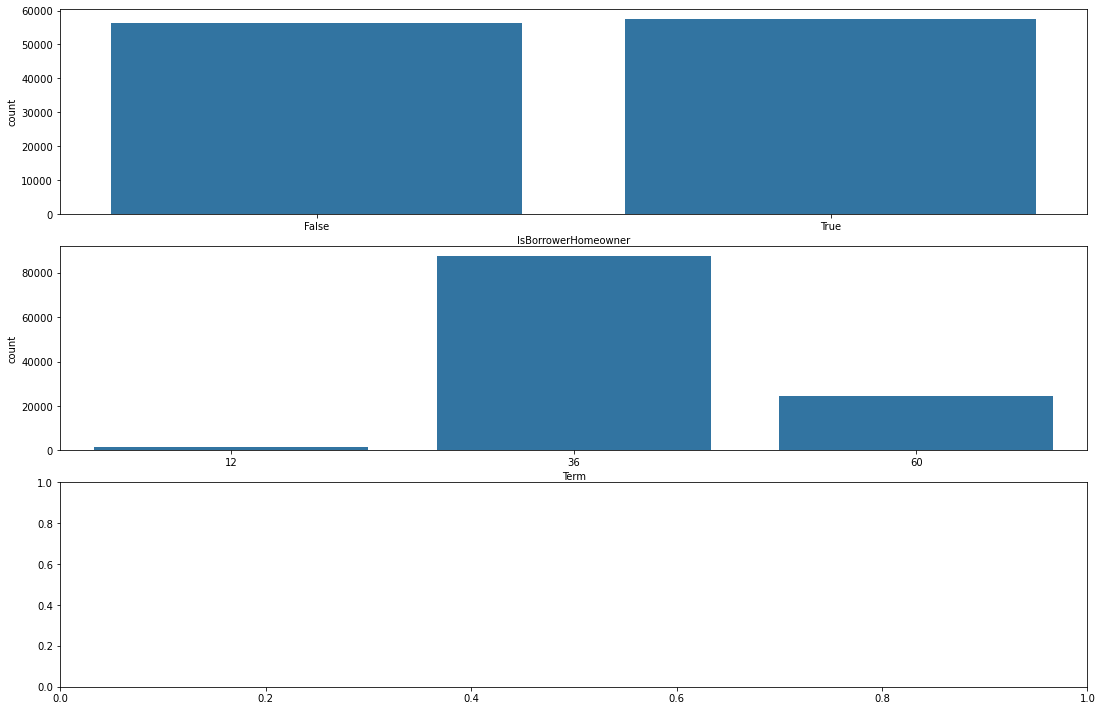

In [8]:
#Lets first look at a few of the columns which don't have a large set of different values

features = ['IsBorrowerHomeowner', 'Term']

loan_categorical_data = loan_data[features]

fig, axes = plt.subplots(3, 1, figsize=(15, 10))

fig.tight_layout()

default_color = sb.color_palette()[0]

for i, col in enumerate(loan_categorical_data.columns):
    sb.countplot(data = loan_categorical_data, x = col, color=default_color, ax=axes[i]);

We can see that the homeowner count is pretty even for those loans provided to non-homeowner vs homeowner. The most common term is 36 months and C is the most common credit grade for the loans.

Lets look at our categorical data with many different values.

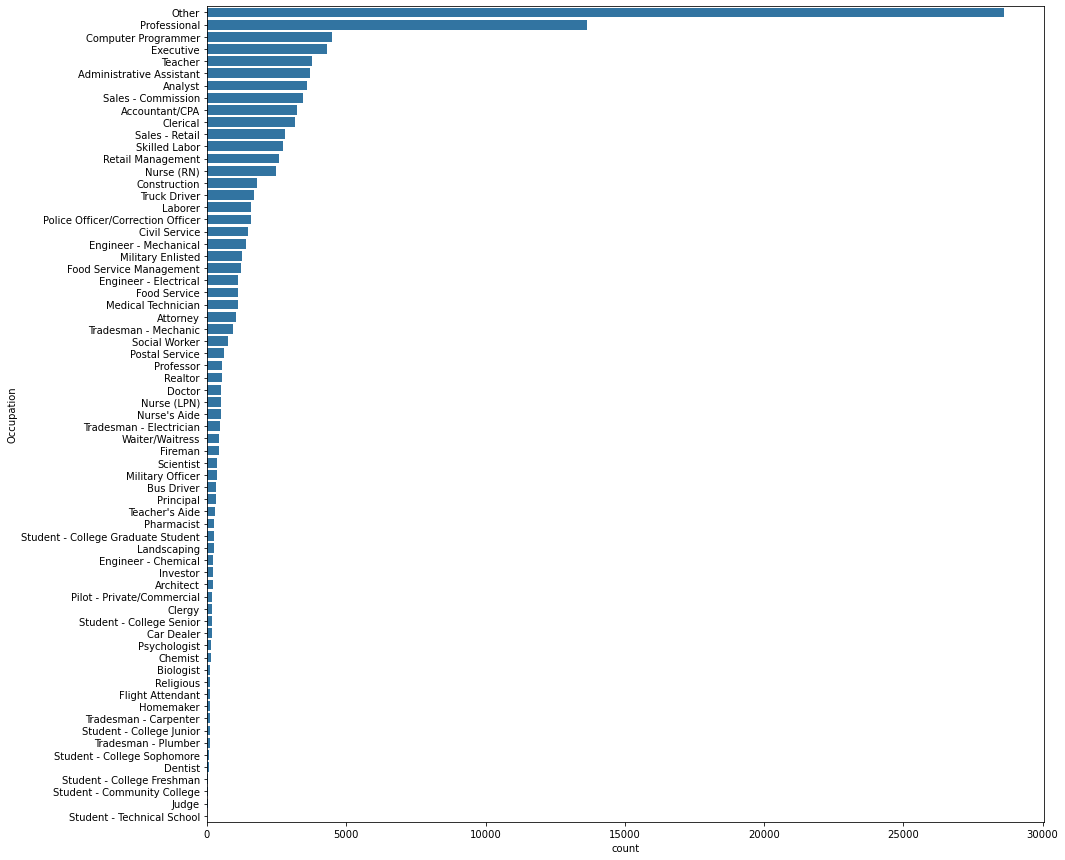

In [9]:
features = ['LoanStatus', 'ListingCategory (numeric)', 'Occupation']

loan_categorical_data = loan_data[features]


plt.figure(figsize=(15, 15))
sb.countplot(data = loan_categorical_data, y = 'Occupation', color=default_color, 
             order = loan_categorical_data['Occupation'].value_counts().index);

We can see from this that there are a ton of different occupations listed. To better see how occupation is distributed a better path might be to bucket each of the occupations. We already have Other, professional, skilled labor so we will expand on those and add in unskilled labor and student. Then bucket each of those in to one of those buckets. We will attempt to bucket these using the rules for identifying the type of occupation outline <a href="https://smallbusiness.chron.com/skilled-labor-vs-unskilled-labor-46154.html">here</a>.

C:\Users\Eric\Anaconda3\envs\datafindins\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


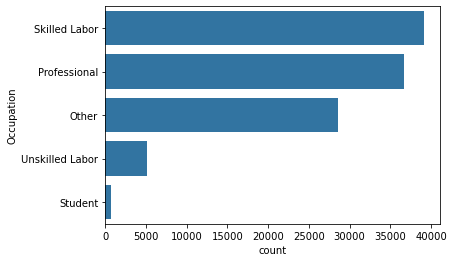

In [10]:
#first we need to be able to map each of the values to a bucket

occupation_mapping = {
    'Other': 'Other',
    'Professional': 'Professional',
    'Computer Programmer': 'Professional',
    'Executive': 'Professional',
    'Teacher': 'Skilled Labor',
    'Administrative Assistant': 'Skilled Labor',
    'Analyst': 'Professional',
    'Sales - Commission': 'Skilled Labor',
    'Accountant/CPA': 'Professional',
    'Clerical': 'Skilled Labor',
    'Sales - Retail': 'Unskilled Labor',
    'Skilled Labor': 'Skilled Labor',
    'Retail Management': 'Skilled Labor',
    'Nurse (RN)': 'Skilled Labor',
    'Construction': 'Skilled Labor',
    'Truck Driver': 'Skilled Labor',
    'Laborer': 'Unskilled Labor',
    'Police Officer/Correction Officer': 'Skilled Labor',
    'Civil Service': 'Skilled Labor',
    'Engineer - Mechanical': 'Professional',
    'Military Enlisted': 'Skilled Labor',
    'Food Service Management': 'Skilled Labor',
    'Engineer - Electrical': 'Professional',
    'Food Service': 'Skilled Labor',
    'Medical Technician': 'Skilled Labor',
    'Attorney': 'Professional',
    'Tradesman - Mechanic': 'Skilled Labor',
    'Social Worker': 'Skilled Labor',
    'Postal Service': 'Skilled Labor',
    'Professor': 'Professional',
    'Realtor': 'Professional',
    'Doctor': 'Professional',
    'Nurse (LPN)': 'Skilled Labor',
    "Nurse's Aide": 'Skilled Labor',
    'Tradesman - Electrician': 'Skilled Labor',
    'Waiter/Waitress': 'Unskilled Labor',
    'Fireman': 'Skilled Labor',
    'Scientist': 'Professional',
    'Military Officer': 'Skilled Labor',
    'Bus Driver': 'Skilled Labor',
    'Principal': 'Professional',
    "Teacher's Aide": 'Skilled Labor',
    'Pharmacist': 'Professional',
    'Student - College Graduate Student': 'Student',
    'Landscaping': 'Unskilled Labor',
    'Engineer - Chemical': 'Professional',
    'Investor': 'Professional',
    'Architect': 'Professional',
    'Pilot - Private/Commercial': 'Professional',
    'Clergy': 'Skilled Labor',
    'Student - College Senior': 'Student',
    'Car Dealer': 'Skilled Labor',
    'Chemist': 'Professional',
    'Psychologist': 'Professional',
    'Biologist': 'Professional',
    'Religious': 'Skilled Labor',
    'Flight Attendant': 'Skilled Labor',
    'Tradesman - Carpenter': 'Skilled Labor',
    'Homemaker': 'Unskilled Labor',
    'Student - College Junior': 'Student',
    'Tradesman - Plumber': 'Skilled Labor',
    'Student - College Sophomore': 'Student',
    'Dentist': 'Professional',
    'Student - College Freshman': 'Student',
    'Student - Community College': 'Student',
    'Judge': 'Professional',
    'Student - Technical School': 'Student'  
}

loan_categorical_data.replace({'Occupation': occupation_mapping}, inplace=True)

#we will go ahead and add this to our main dataset as a new column

loan_data["Occupation_Bucketed"] = loan_categorical_data['Occupation']

sb.countplot(data = loan_categorical_data, y = 'Occupation', color=default_color, 
             order = loan_categorical_data['Occupation'].value_counts().index);

After our bucketing we can see that most loans had been provided to skilled labor or professionals.

Lets look at the Listing Category now.

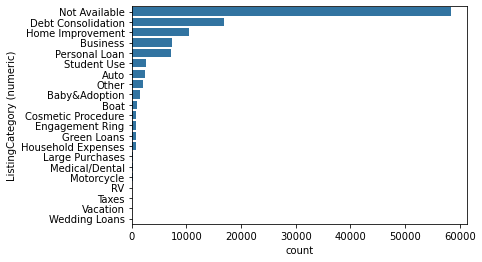

In [11]:
g = sb.countplot(data = loan_categorical_data, y = 'ListingCategory (numeric)', color=default_color, 
             order = loan_categorical_data['ListingCategory (numeric)'].value_counts().index);

g.set_yticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]);
g.set_yticklabels(['Not Available','Debt Consolidation','Home Improvement','Business','Personal Loan','Student Use',
                   'Auto','Other','Baby&Adoption','Boat','Cosmetic Procedure','Engagement Ring','Green Loans',
                   'Household Expenses','Large Purchases','Medical/Dental','Motorcycle','RV','Taxes','Vacation',
                   'Wedding Loans']);

We can see from this that the vast majority of loan types is not provided in this data set.

Finally let us take a look at the status of the loan.

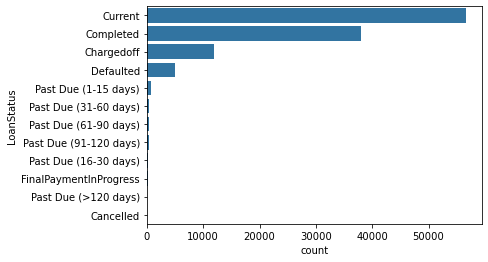

In [12]:
g = sb.countplot(data = loan_categorical_data, y = 'LoanStatus', color=default_color, 
             order = loan_categorical_data['LoanStatus'].value_counts().index);

#### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations? 

The orignal loan amount looked to have 3 peaks at 5k, 10k and 15k. Additionally we can see that the large majority of loans are still in a current status and not in a non-ideal status (defaulted). The investors feature was interesting in that it has a very large peak where most loans had a single investor but after that peak it was normally distributed around ~90 investors.

#### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

Both investors and loan amount were left skewed so log scale transforms were performed to help see the above mentioned insights. Due to a large number of occupations we mapped occupations to buckets to help us better see the number of loans for each of the skill levels of the individual taking out the loan.

### Bivariate Exploration<a id="bi"></a>

Now we will look at how our features relate to one another. First we will look at our numerical features.

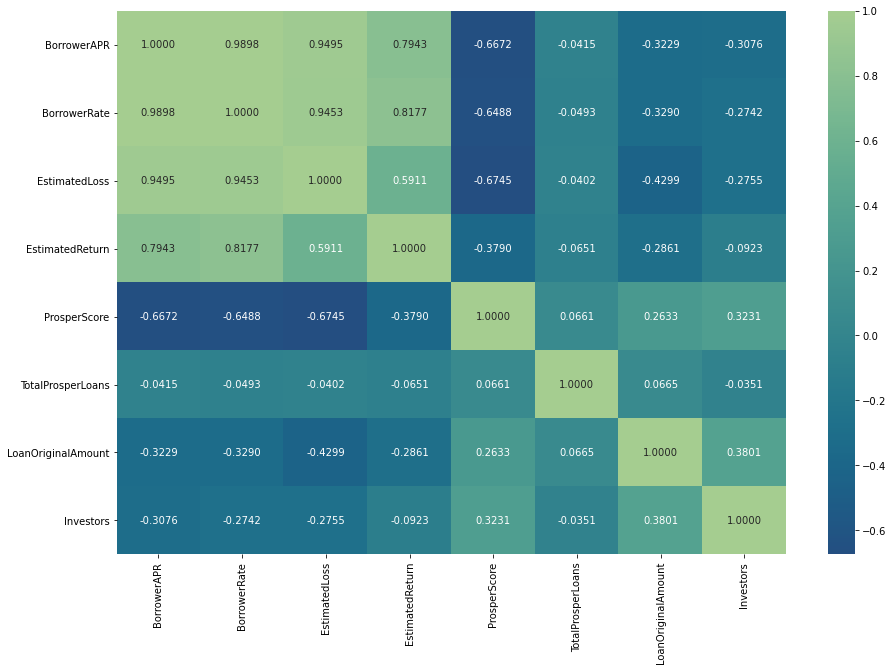

In [13]:
#correlation plot

plt.figure(figsize=(15,10))
sb.heatmap(loan_data[numerical_columns].corr(), annot = True, fmt = '.4f', cmap='crest_r', center=0);

One interesting thing to note is the strong positive correlation of the features in the top left corner of the graph.

Now will look at how the features compare using a scatterplot.

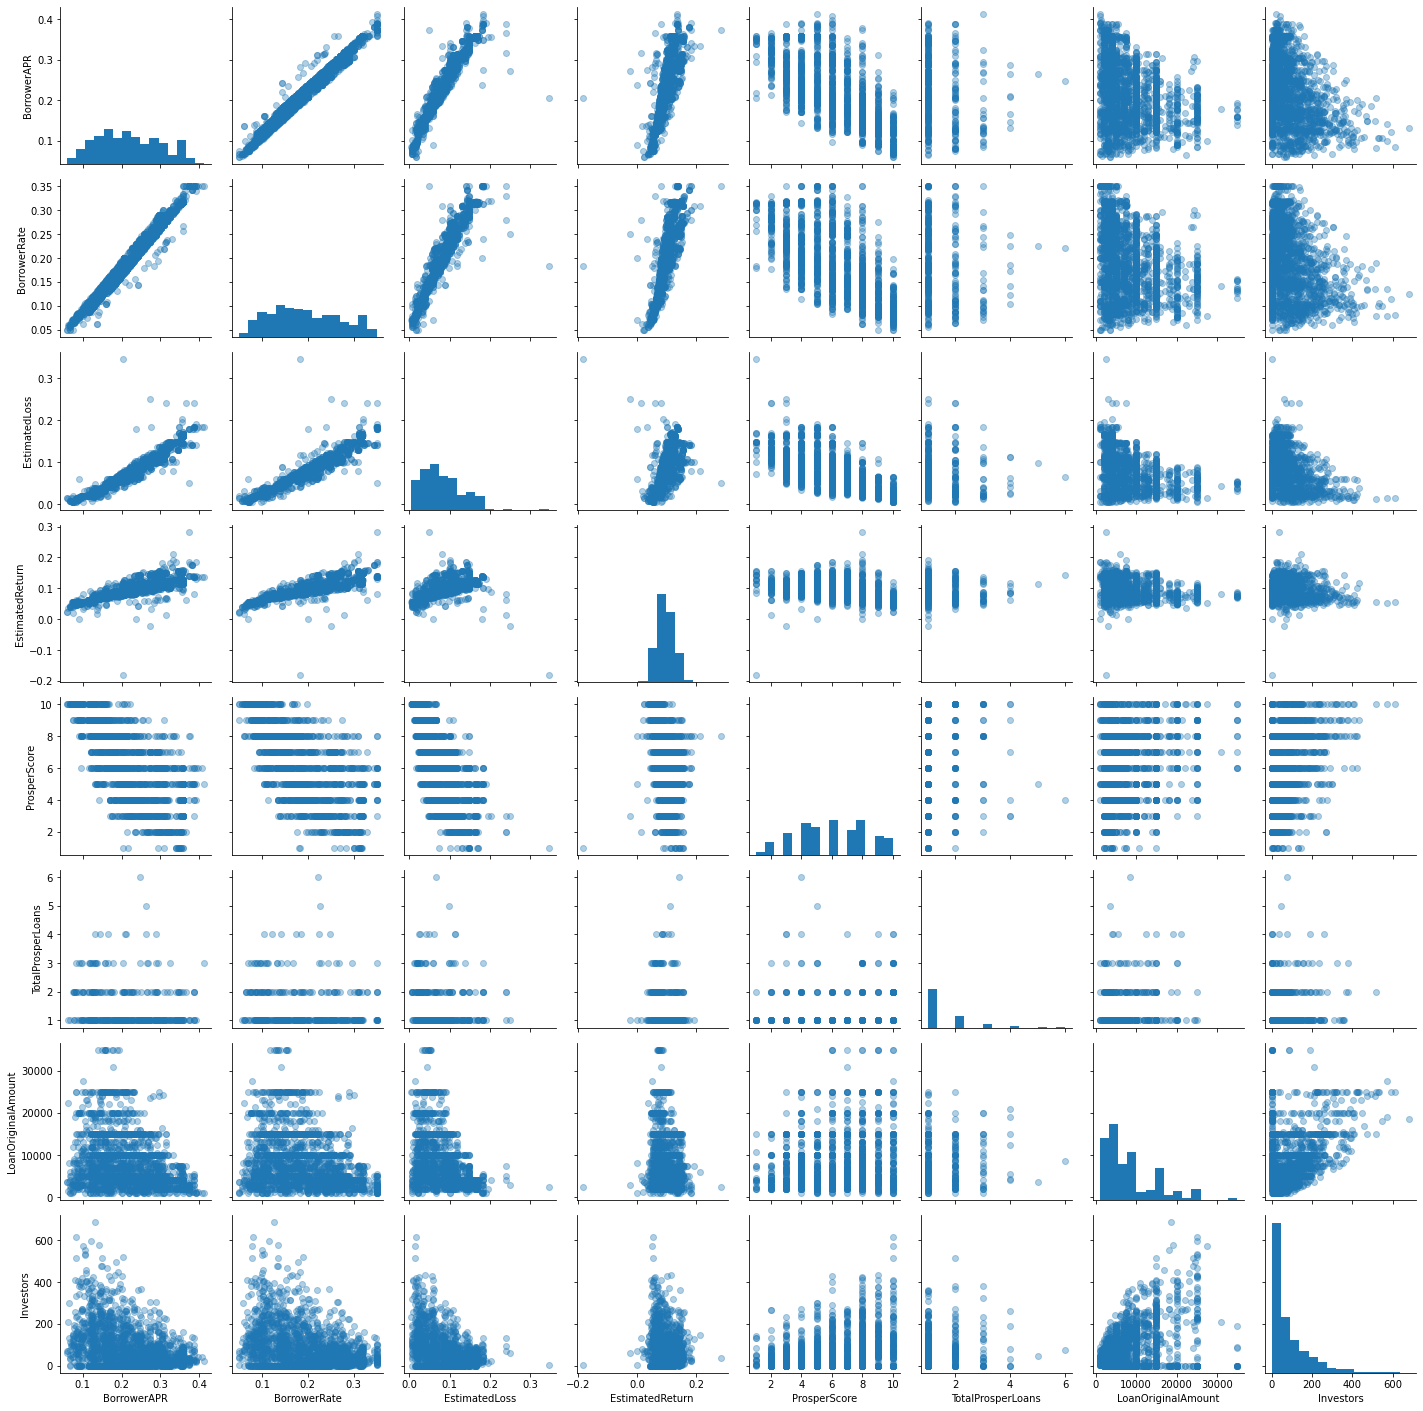

In [14]:
#As the data set is large we will take a sample of 2000 and graph that.

loan_sample = loan_data.sample(2000, replace=False)

g = sb.PairGrid(data=loan_sample, vars = numerical_columns)
g = g.map_diag(plt.hist, bins=15);
g.map_offdiag(plt.scatter, alpha=.35);

As noted from our correlation matrix we can see in the scatter plots that the top left corner are highly correlated. This is fairly intuitive being that a higher APR/interest rate would likely lead to a higher return on the loan. Interesting a higher loss rate is also correlated with a high return which would also make since as a high loss would mean higher risk and more risk should equate to a higher interest rate and more return.

One thing I found interesting was that more investors on a loan is negatively correlated with estimate loss. I would have thought that more investors pooled into a loan would mean a more risky loan due to risk being spread among more investors.

Now let us take a look at how our categorical features look with our numerical features. We will look at BorrowerAPR, EstimatedLoss, EstimatedReturn and LoanOriginalAmount and look at what those values present when looking at LoanStatus, our Occupation buckets, and Term.

C:\Users\Eric\Anaconda3\envs\datafindins\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Eric\Anaconda3\envs\datafindins\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Eric\Anaconda3\envs\datafindins\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpr

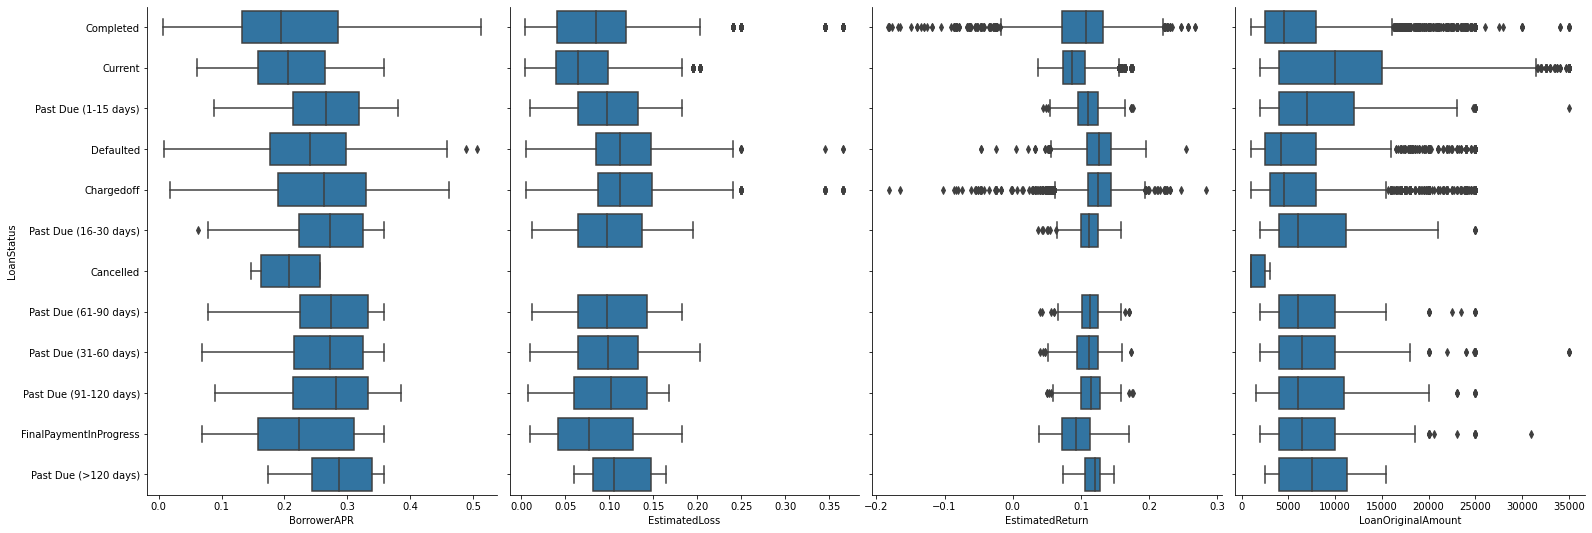

In [15]:
#as this is broken up across status we won't look at a sample and look at full data set

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. ***Code provided from the example***"""
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, orient='h', color = default_color)

g = sb.PairGrid(data=loan_data, x_vars = ['BorrowerAPR', 'EstimatedLoss', 'EstimatedReturn', 'LoanOriginalAmount'],
               y_vars = ['LoanStatus'], height=7.5, aspect=.75);

g.map(boxgrid);

g.tight_layout();

C:\Users\Eric\Anaconda3\envs\datafindins\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Eric\Anaconda3\envs\datafindins\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Eric\Anaconda3\envs\datafindins\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpr

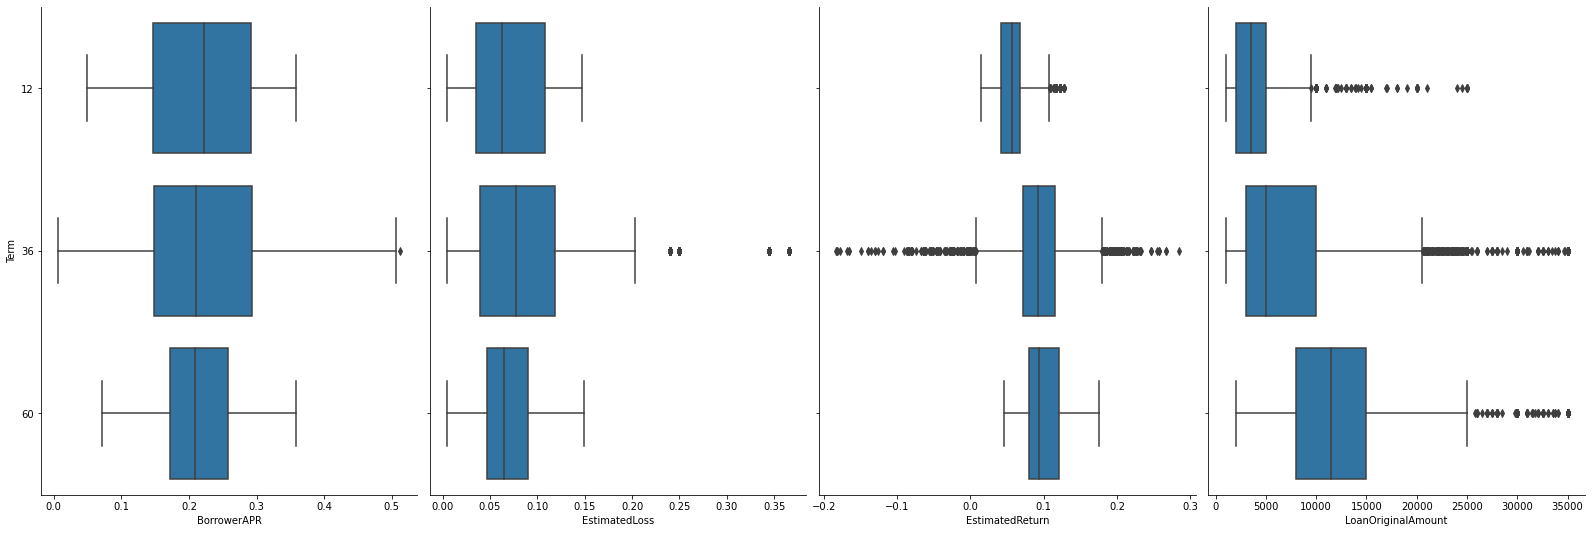

In [16]:
g = sb.PairGrid(data=loan_data, x_vars = ['BorrowerAPR', 'EstimatedLoss', 'EstimatedReturn', 'LoanOriginalAmount'],
               y_vars = ['Term'], height=7.5, aspect=.75);

g.map(boxgrid);

g.tight_layout();

C:\Users\Eric\Anaconda3\envs\datafindins\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Eric\Anaconda3\envs\datafindins\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Eric\Anaconda3\envs\datafindins\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpr

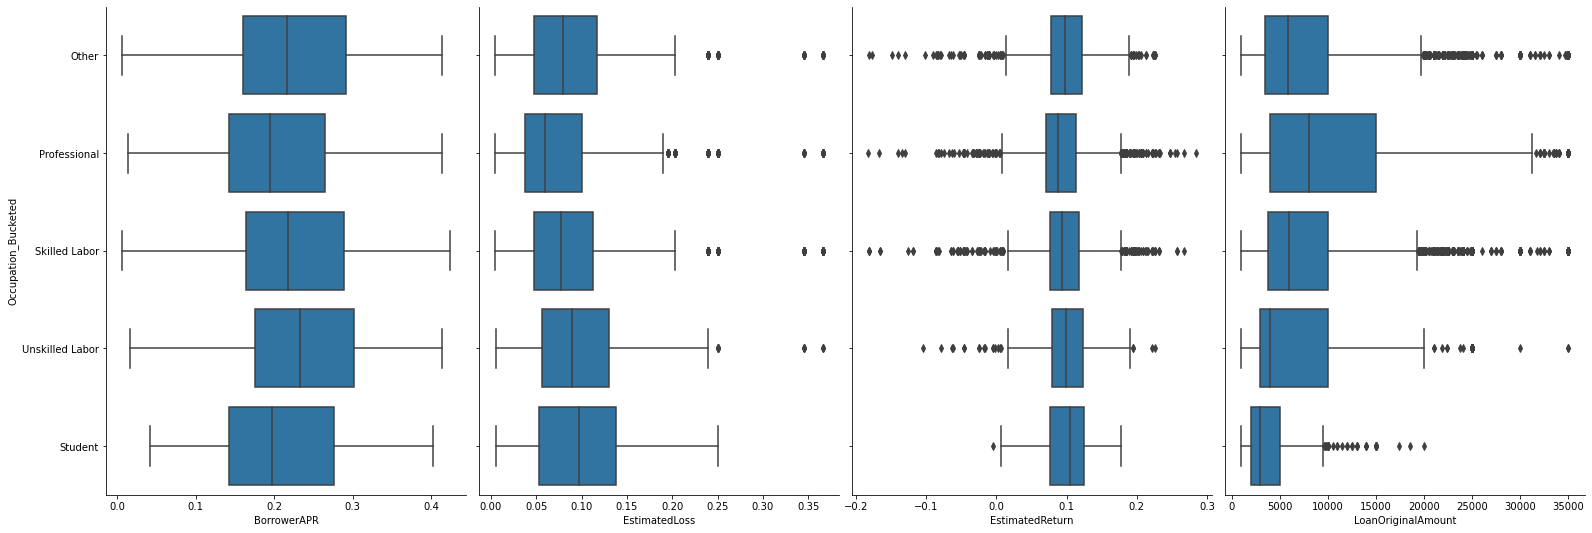

In [17]:
g = sb.PairGrid(data=loan_data, x_vars = ['BorrowerAPR', 'EstimatedLoss', 'EstimatedReturn', 'LoanOriginalAmount'],
               y_vars = ['Occupation_Bucketed'], height=7.5, aspect=.75);

g.map(boxgrid);

g.tight_layout();

We see that professional occupations are associated with a lower APR and estimated loss/return. They ten to have a higher loan amount also, which tracks with the idea that these individuals due to their careers would be in a better position to pay back a loan provided to them. Intuitively higher loan amounts are associated with the largest term provided.

Finally  we see that on the loan status that charge offs and defaults have a slightly less loan amount mean, along with a larger estimated return/loss. This however leads me to question based on what we are seeing how does those values compare with the prosper scores on those loan? So lets take a look at that real quick.

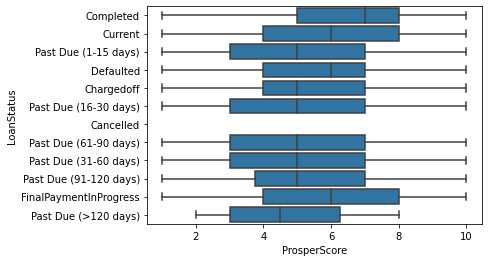

In [18]:
sb.boxplot(data = loan_data,  x='ProsperScore', y='LoanStatus', color=default_color);

From this we do see the relationship that the defaulted and charge off loans are associated with a lower prosper score, although from this example we see final payments on loan even lower which is an interesting thing to note.

From here we will finish our bivariable exploration by comparing the categorical data with each other.

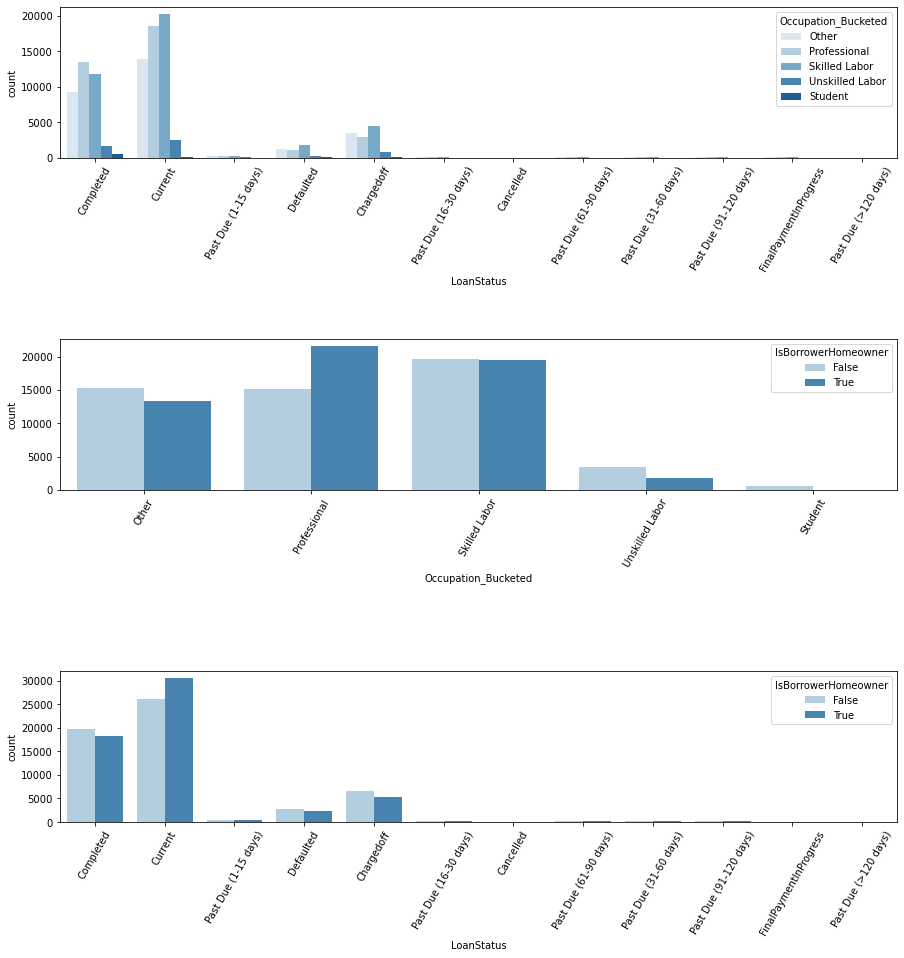

In [19]:
fig = plt.figure(figsize=(15,15))

plt.subplot(3, 1, 1)
sb.countplot(data=loan_data, x='LoanStatus', hue='Occupation_Bucketed', palette='Blues');
plt.xticks(rotation=60);

plt.subplot(3, 1, 2)
sb.countplot(data=loan_data, x='Occupation_Bucketed', hue='IsBorrowerHomeowner', palette='Blues');
plt.xticks(rotation=60);

plt.subplot(3, 1, 3)
sb.countplot(data=loan_data, x='LoanStatus', hue='IsBorrowerHomeowner', palette='Blues');
plt.xticks(rotation=60);


fig.subplots_adjust(hspace=1.2)

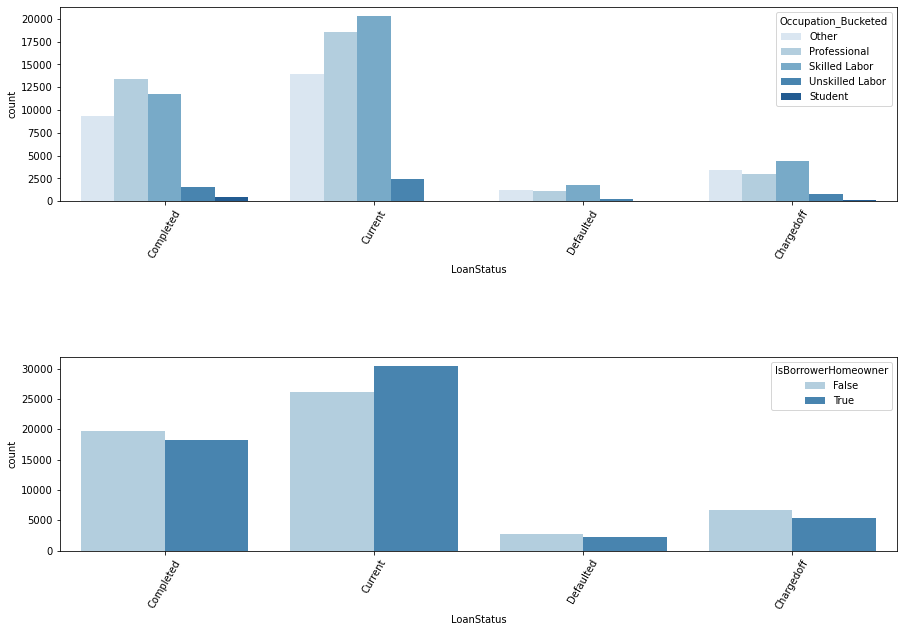

In [20]:
#change our data to just look at the four most common loan status values

loan_data_status_filter = loan_data.query('LoanStatus=="Completed" or LoanStatus=="Current" or LoanStatus=="Defaulted" or LoanStatus=="Chargedoff"')

fig = plt.figure(figsize=(15,10))

plt.subplot(2, 1, 1)
sb.countplot(data=loan_data_status_filter, x='LoanStatus', hue='Occupation_Bucketed', palette='Blues');
plt.xticks(rotation=60);

plt.subplot(2, 1, 2)
sb.countplot(data=loan_data_status_filter, x='LoanStatus', hue='IsBorrowerHomeowner', palette='Blues');
plt.xticks(rotation=60);


fig.subplots_adjust(hspace=.8)

#### Bivariate Relationships Observed 

BorrowerAPR/rate had a high positive correlation with estimated return and loss. Further the prosper score was negatively correlated with the borrower APR/interested rate, estimated return and loss. When looking at our numerical features with categorical features we see that professional occupations were more associated with lower APR/interest rate and estimated loss/return. The professional occupations also took loans for higher original amounts than the other career buckets. We also saw that loan that defaulted or charged off had lower loan amounts. When comparing our loan status to the prosper score we do see the mean of completed and in final payment status is much higher than the other statuses.

Finally when looking at our categorical features we saw that professional careers had more completed loans than the other buckets. Interestingly we saw homeownership did not show much of a difference in loan status with non-homeowner's have slighly more defaults/charge offs but also completed loans.

#### Interesting Observation

I found it interesting that the number of investors on a given loan was negatively correctly with the estimated loss of the loan. This comes from the fact that I would think more investors on any single loan would minimize the loss to any single investor, the returns for that matter, and so investors all going in on a single loan would be more willing to take a larger risk.

### Multivariate Exploration<a id="multi"></a>

We will start with looking at how loan amount and estimated loss compare across the occupation buckets.

In [21]:
#add a column for the log of loan amount

loan_data['LoanAmountLog'] = np.log10(loan_data['LoanOriginalAmount'])

def hist2dgrid(x, y, **kwargs):
    """***Taken from example and edited for this case  Quick hack for creating heat maps with seaborn's PairGrid. """
    x_bins = np.arange(2.5, 4.6, .075)
    y_bins = np.arange(0, .4, .025)
    plt.hist2d(x, y, bins = [x_bins, y_bins], range=[[2, 5], [0, .4]], cmap = 'inferno_r', cmin = 0.5)
    plt.xlim(2, 4.6)
    plt.xticks(np.log10([1000, 5000, 10000, 15000, 25000, 40000]),
           ['1k', '5k', '10k', '15k', '25k', '40k']);

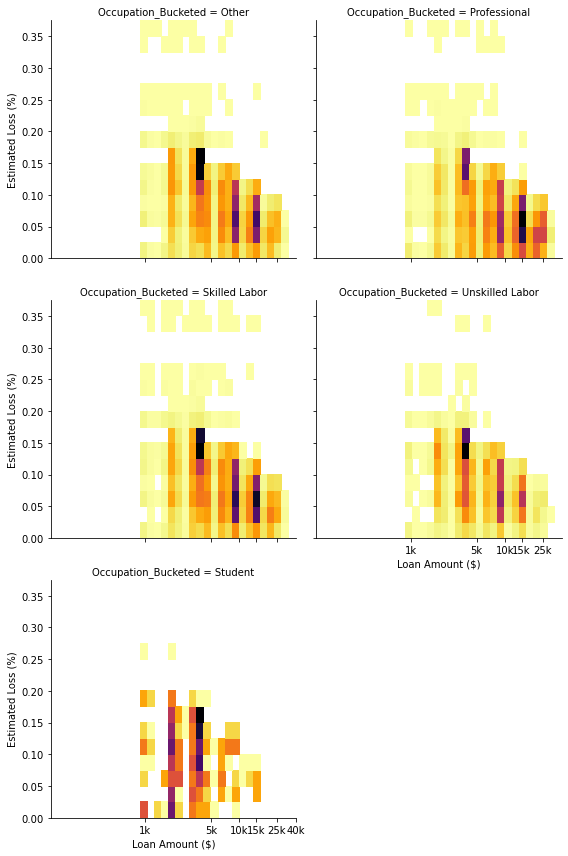

In [22]:
g = sb.FacetGrid(data=loan_data, col='Occupation_Bucketed', col_wrap=2, height = 4);
g.map(hist2dgrid, 'LoanAmountLog', 'EstimatedLoss');
g.set_xlabels('Loan Amount ($)');
g.set_ylabels('Estimated Loss (%)');

We can see from these heatmaps that professionals have the higher loan amounts with lower loss score. Students show the lower loan amounts and generally higher rates. The other 3 buckets appear generally the same where, what we noted in our univariate exploration, the higher numbers are around the 5k increments, ie 5k, 10k, 15k.

Lets look at this instead of across occupation across the prosper score now.

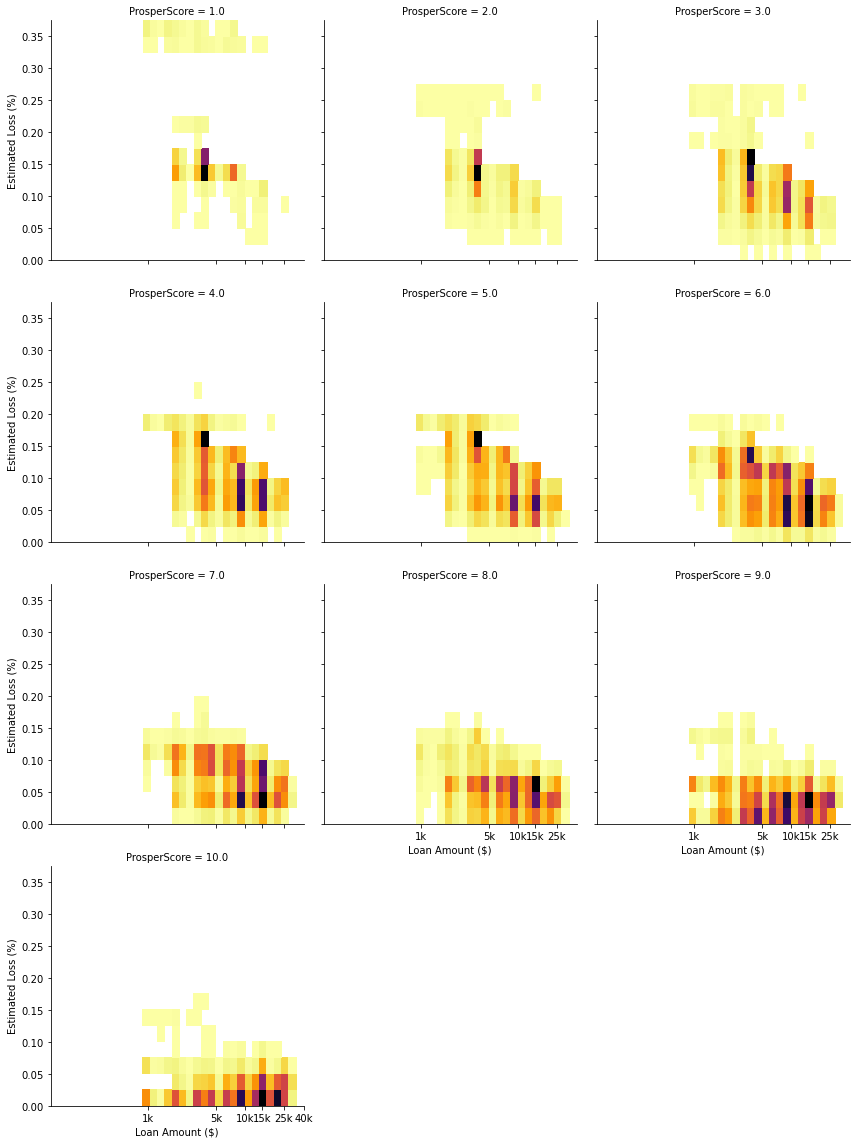

In [23]:
#lets look at it across prosper score now

g = sb.FacetGrid(data=loan_data, col='ProsperScore', col_wrap=3, height=4);
g.map(hist2dgrid, 'LoanAmountLog', 'EstimatedLoss');
g.set_xlabels('Loan Amount ($)');
g.set_ylabels('Estimated Loss (%)');

Here we see a clear pattern where the prosper score increases the loans that relate to those amounts are generally higher in loan amount and lower in estimated loss.

Lets compare this to loan status now.

<__array_function__ internals>:5: UserWarning: Warning: converting a masked element to nan.
C:\Users\Eric\Anaconda3\envs\datafindins\lib\site-packages\numpy\core\_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


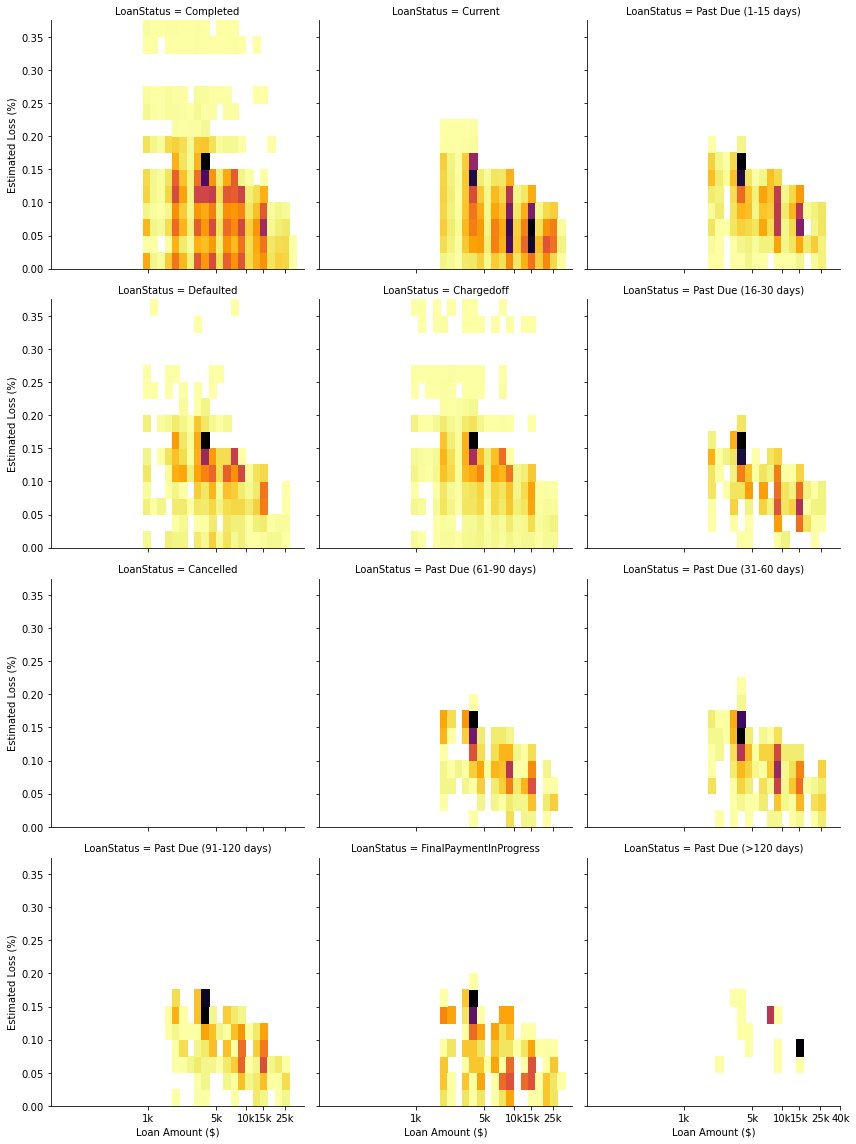

In [24]:
#finally loan status

g = sb.FacetGrid(data=loan_data, col='LoanStatus', col_wrap=3, height=4);
g.map(hist2dgrid, 'LoanAmountLog', 'EstimatedLoss');
g.set_xlabels('Loan Amount ($)');
g.set_ylabels('Estimated Loss (%)');

And here was see that the loans in a not ideal status (default, charge off, past due) tend to be higher estimated loss but the laon amount generally is still distributed across 1k-25k, although slightly tighter around 5k-25k than the current/completed loans.

Now lets look at just our 3 loan statuses of completed, defaulted, chargedoff and ignore the rest. This should let us see if there is a distinct relationship between the completed loans vs the worst of the statuses.

For this we use loan amount and prosper scores, then categorize it by both occupation buckets.

<ipython-input-27-5a388abf17b2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  status_filtered['ProsperScore'] = status_filtered['ProsperScore'].astype(str)
<ipython-input-27-5a388abf17b2>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  status_filtered['ProsperScore'] = status_filtered['ProsperScore'].astype(ordered_score)


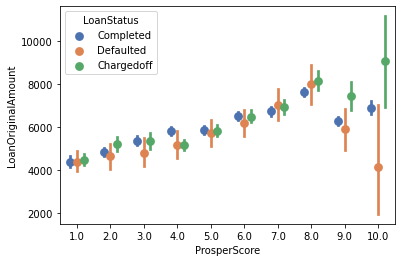

In [27]:
status_filtered = loan_data.query('LoanStatus in ["Completed", "Defaulted", "Chargedoff"]')

status_filtered['ProsperScore'] = status_filtered['ProsperScore'].astype(str)

score_order = ['1.0', '2.0', '3.0','4.0', '5.0', '6.0','7.0','8.0','9.0','10.0']

ordered_score = pd.api.types.CategoricalDtype(ordered=True, categories = score_order)

status_filtered['ProsperScore'] = status_filtered['ProsperScore'].astype(ordered_score)

sb.pointplot(data=status_filtered, y='LoanOriginalAmount', x='ProsperScore', hue='LoanStatus', dodge=.4, palette='deep', linestyles='', height=4);
g.set_ylabels('Loan Amount ($)');
g.set_xlabels('ProsperScore');

We can see that when we hit the 9, 10, 11 prosper scores things get interesting where for both 9 and 10 high amounts are associated with more charge offs however a scroe of 11 shows that large loans are getting completed.

Lets see how this compares across occupations buckets.

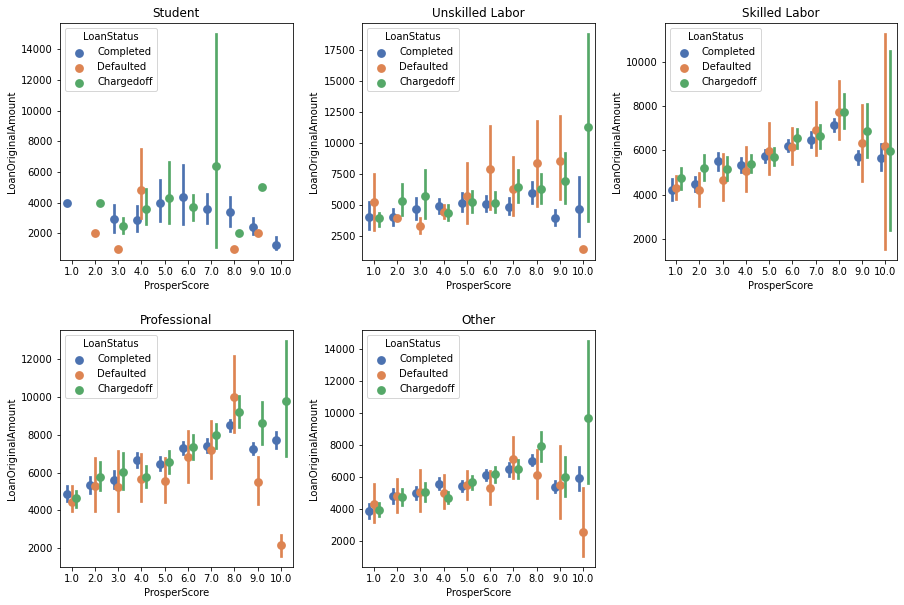

In [28]:

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))


for idx, occupation in enumerate(['Student', 'Unskilled Labor', 'Skilled Labor', 'Professional', 'Other']):
    data = status_filtered.query(f'Occupation_Bucketed == "{occupation}"')
    ax = axes[idx // 3, idx % 3]
    sb.pointplot(data=data, x='ProsperScore', y='LoanOriginalAmount', hue='LoanStatus', dodge=.4,
                                        hue_order=['Completed', 'Defaulted', 'Chargedoff'],
                                        linestyles='', palette='deep', ax=ax)
    ax.title.set_text(occupation);

    
fig.subplots_adjust(wspace=.3, hspace=.3)
fig.delaxes(axes[1, 2]);

There are a few interesting things with these plots to note of. On the student plot we can see that as the prosper score increases the loan amount mean increases until about 5 and 6 and starts decreasing however generally the 3 status stay pretty close in distribution. Unskilled labor shows that regardless of the score when the mean loan amount is higher it the status is more likely to be defualted or charged off. 

#### Observed multivariable relationships

We saw that higher prosper scores were generally related to lower estimated risk and lower amounts. We saw that when looking at these with occupation buckets that the professional did show a lower risk and high loan amount than the other buckets. We also saw that unideal loan statuses (defaults, charge off, past due) were more associated with higher risk and higher loan amounts, and again professional occupations generally had a better status where as unskilled buckets had worst status.

#### Interesting Interactions

One interesting point we saw was around the point plots for the student occupation bucket. We saw that loan amount increased up to prosper score of around 5 and 6 then started trendings downward.

### Summary<a id="summary"></a>

To summarize we looked at different loan features, including estimated return, estimated loss, loan original amount, occupation bucket, and how they compared across loan status, prosper score, or occupation.

In our univariate analysis we noted how the original loan amount peaked around the 5k, 10k and 15k marks and the majority of loans were still in current status.

For the bivariate analysis we saw high correlation around estimated return/loss and borrower APR/rate. We saw on the occupation buckets that professional occupations were associated with lower borrower APR/rate and also generally were higher original loan amounts.

Finally in our multivariate analysis we higher prosper scores were related to lower estimated risk and lower original loan amounts. Additionally looking at it across occupation buckets we so loan statuses that were not ideal (default, charge off, past due) were more associated with higher risk/ higher original loan amounts, and that across the occupations the unskilled occupations tended to have a worst status and a professional occupation was related to a better status.